# knock85

In [ ]:
# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 1
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values()))
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
NUM_LAYERS = 2
LEARNING_RATE = 5e-2
BATCH_SIZE = 32
NUM_EPOCHS = 10

# モデルの定義
model = RNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, emb_weights=weights, bidirectional=True) #双方向

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


epoch: 1, loss_train: 1.1729, accuracy_train: 0.4015, loss_valid: 1.1792, accuracy_valid: 0.4010, 11.5434sec
epoch: 2, loss_train: 1.1567, accuracy_train: 0.4729, loss_valid: 1.1835, accuracy_valid: 0.4655, 11.5417sec
epoch: 3, loss_train: 1.0776, accuracy_train: 0.5877, loss_valid: 1.0975, accuracy_valid: 0.5690, 11.2746sec
epoch: 4, loss_train: 1.1224, accuracy_train: 0.5361, loss_valid: 1.1627, accuracy_valid: 0.5112, 10.7200sec
epoch: 5, loss_train: 1.0236, accuracy_train: 0.6189, loss_valid: 1.0675, accuracy_valid: 0.5877, 11.6852sec
epoch: 6, loss_train: 1.1253, accuracy_train: 0.5455, loss_valid: 1.1935, accuracy_valid: 0.5172, 11.5233sec
epoch: 7, loss_train: 0.9604, accuracy_train: 0.6433, loss_valid: 1.0123, accuracy_valid: 0.5982, 11.5627sec
epoch: 8, loss_train: 1.0582, accuracy_train: 0.5934, loss_valid: 1.1374, accuracy_valid: 0.5585, 11.5217sec
epoch: 9, loss_train: 1.0465, accuracy_train: 0.5915, loss_valid: 1.1189, accuracy_valid: 0.5555, 10.6006sec
epoch: 10, loss_tra

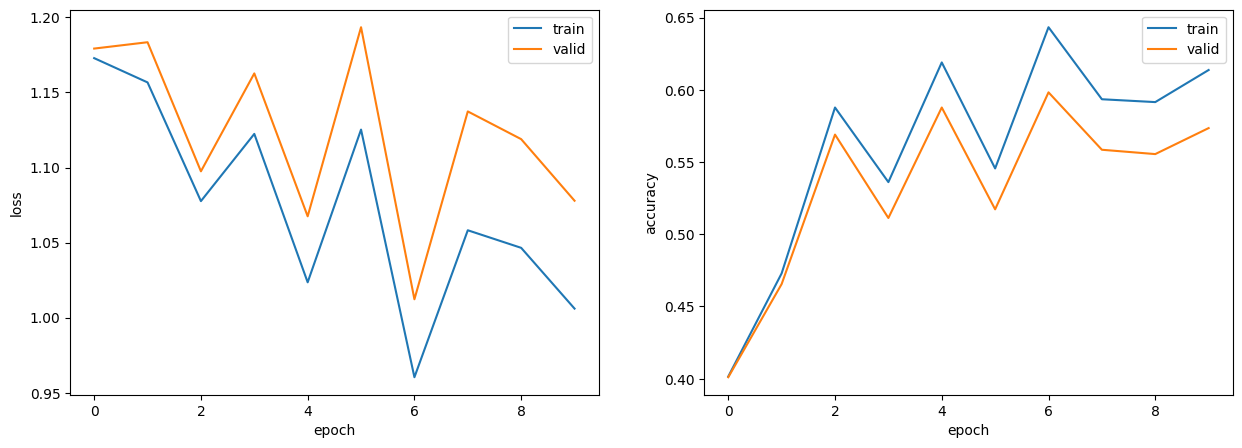

正解率（学習データ）：0.614
正解率（評価データ）：0.594


In [ ]:
# ログの可視化
visualize_logs(log)

# 正解率の算出
_, acc_train = calculate_loss_and_accuracy(model, dataset_train, device)
_, acc_test = calculate_loss_and_accuracy(model, dataset_test, device)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')